In [1]:
pathdir='/content/drive/MyDrive/EpidemicModel/model3'
import sys
sys.path.append(pathdir)

In [2]:
!pip install hypernetx
!pip install powerlaw
!pip install celluloid
!pip install igraph

In [13]:
import json
from drive.MyDrive.EpidemicModel.model3.epidemicmodel import EpidemicModel
from drive.MyDrive.EpidemicModel.model3.epidemicplotter import Eplot
from drive.MyDrive.EpidemicModel.model4.hypergraph_generator import get_hypergraph
from drive.MyDrive.EpidemicModel.model4.epidemics import discrete_SIS
import time
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import itertools
from itertools import combinations 
import networkx as nx
import bisect
from collections import defaultdict
import hypernetx as hnx

In [4]:
"------Random host generator for epidemic model----"
def random_hosts(number_of_hosts, infectious_number):
    sum_of_infectious = 0
    _list=[]    
    for i in range(number_of_hosts):
        _attr_list = {}
        _attr_list['id'] = int(str(10)+str(i))
        _edgelist = []
        _attr_list['is tested'] = False
        _attr_list['quarantine time'] = 0
        _attr_list['state'] = 's'
        _attr_list['exposed time'] = 0
        _attr_list['fresh quarantine'] = False
        _list.append([_edgelist,_attr_list])
    if 0 <= infectious_number and infectious_number < 1:
        s = number_of_hosts * rate_of_infectious
    elif 1 <= infectious_number:
        s = infectious_number
    while sum_of_infectious < s:
        random_host = rnd.choice(_list)
        random_host[1]['state'] = 'i'
        sum_of_infectious += 1
    return _list

In [5]:
hyperedge_types = {}
hyperedge_types['u'] = {'spreading rate' : 0.6, 'distribution': 'uniform','size' : 4}
hyperedge_types['w'] = {'spreading rate' : 0.3, 'distribution': 'binom', 'size mean' : 9, 'size variance' : 2.51}
exposed_end_time = 0
quarantine_length = 10
testing_prob = 0
model='basic'

In [6]:
state_transition_probs = {}
state_transition_probs['s'] = {'s': 1}
state_transition_probs['e'] = {'i': 1}
state_transition_probs['i'] = {'s': 0.3}

In [7]:
_list = random_hosts(1000,1)
epidemicmodel = EpidemicModel(_list, state_transition_probs,
                              states=['s','e','i'],
                              model='basic')
for i in range(5):
  epidemicmodel.generate_hyperedges(hyperedge_types['u'], 'u')

start = time.time()
rates, daily_infections, daily_positive_tests, i = epidemicmodel.run(1000)
print(time.time() - start)

16.331678867340088


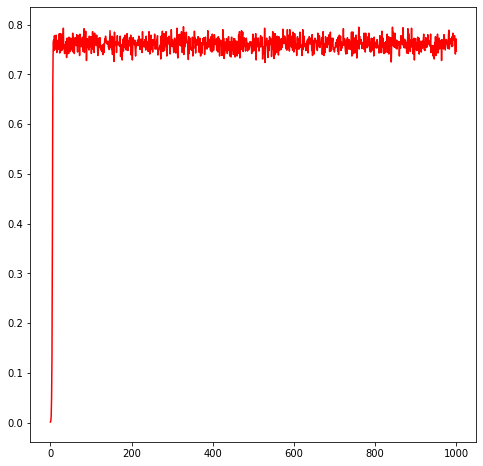

In [8]:
plt.plot(rates['infectious'], 'r')

In [9]:
epidemicmodel.hypergraph.edges[0].attr_list

{'id': '0',
 'number of infectious': 3,
 'spreading rate': 0.6,
 'type': 'u',
 'weight': 0.15}

In [10]:
H=epidemicmodel.hypergraph.to_hnx_hypergraph()

In [15]:
edge_types=defaultdict(lambda:'f')
dt=1
tmax=1000
tau={'f':0.6}
mu=0.3
start = time.time()
t1, S1, I1 = discrete_SIS(H,edge_types ,tau, mu, rho=0.1, tmin=0, tmax=tmax, dt=dt)
print('running time: ' + str(time.time() - start))

running time: 3.5232105255126953


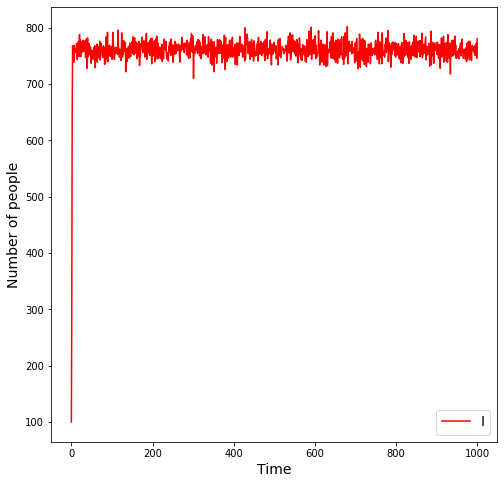

In [16]:
plt.figure()
plt.plot(t1, I1, 'r', label='I')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [17]:
len(H.edges)

1250

In [18]:
len(epidemicmodel.hypergraph.edges)

1250

In [17]:
H2=get_hypergraph('regular', 
                 args={'n' : 1000, 'd':5, 'distribution': 'uniform','size' : 4}
                 )

In [18]:
edge_types=defaultdict(lambda:'f')
dt=1
tmax=1000
tau={'f':0.6}
mu=0.3
start = time.time()
t1, S1, I1 = discrete_SIS(H2,edge_types ,tau, mu, rho=0.1, tmin=0, tmax=tmax, dt=dt)
print('running time: ' + str(time.time() - start))

running time: 3.6453423500061035


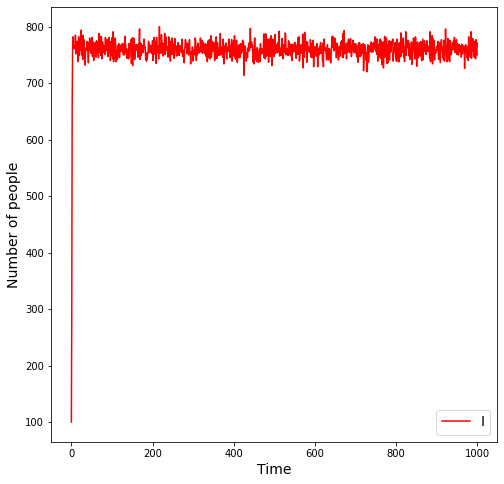

In [19]:
plt.figure()
plt.plot(t1, I1, 'r', label='I')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of people", fontsize=14)
plt.legend(fontsize=14)
plt.show()